# Airbnb Data Analysis: Austin

In [1]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# General imports for pre-processing data and modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score 

# Model evaluation
from sklearn import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate


# Ensemble methods
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import plot_importance

## Cleaning and Preprocessing

The preliminary focus will be on the listings data

In [3]:
# Data source paths
listings_path = './airbnb_data/austin/03-2022/listings.csv'
raw_list_df = pd.read_csv(listings_path)

pd.set_option('display.max_columns', len(raw_list_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)

In [4]:
raw_list_df.shape

(11972, 74)

In [5]:
raw_list_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
raw_list_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220312074014,2022-03-13,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, Texas, United States",78702,NaN,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Patio or balcony"", ""Hair dryer"", ""Security c...",$240.00,2,90,2.0,3.0,90.0,90.0,2.0,90.0,NaN,t,7,18,44,305,2022-03-13,585,42,5,2009-03-08,2022-03-07,4.83,4.87,4.85,4.89,4.81,4.73,4.78,NaN,f,1,1,0,0,3.69
1,5769,https://www.airbnb.com/rooms/5769,20220312074014,2022-03-31,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,t,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, Texas, United States",78729,NaN,30.45697,-97.78422,Private room in home,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Essentials"", ""Hair dryer"", ""Hot water"", ""Hea...",$42.00,1,14,1.0,1.0,14.0,14.0,1.0,14.0,NaN,t,0,0,0,0,2022-03-31,264,3,0,2010-04-10,2021-07-03,4.90,4.90,4.86,4.91,4.94,4.74,4.92,NaN,f,1,0,1,0,1.81
2,6413,https://www.airbnb.com/rooms/6413,20220312074014,2022-03-31,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/4f35e...,https://a0.muscache.com/im/pictures/user/4f35e...,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Austin, Texas, United States",78704,NaN,30.24885,-97.73587,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Kitchen"", ""Microwave"", ""Stove"", ""Shampoo"", ""...",$109.00,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,2022-03-31,117,2,0,20

In [7]:
# Drop extraneous metadata/columns not currently of interest
drop_cols = ['listing_url','scrape_id','last_scraped','name', 'description', 'neighborhood_overview', 'picture_url', 'host_id','host_url','host_name','host_location','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','host_about','amenities']
list_df = raw_list_df.drop(drop_cols, axis = 1)

In [8]:
list_df.isna().sum()

id                                                  0
host_since                                          3
host_response_time                               3449
host_response_rate                               3449
host_acceptance_rate                             2862
host_is_superhost                                   3
host_listings_count                                 3
host_total_listings_count                           3
host_has_profile_pic                                3
host_identity_verified                              3
neighbourhood                                    4913
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    11972
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                   

### Price: convert currency string into float

In [9]:
from re import sub
from decimal import Decimal

# Adapted from https://stackoverflow.com/questions/8421922/how-do-i-convert-a-currency-string-to-a-floating-point-number-in-python
list_df['price'] = list_df['price'].apply(lambda x: float(Decimal(sub(r'[^\d.]', '', x))))

In [10]:
# Add distance to downtown austin
from geopy import distance

downtown = (34.0488, -118.2518)

list_df['dist_downtown'] = list_df.apply(lambda x: distance.distance(downtown, (x['latitude'], x['longitude'])).miles, axis = 1)

In [11]:
list_df.drop(['host_listings_count','host_total_listings_count'], axis=1, inplace=True)

In [12]:
# Drop neighbourhood cleansed column for now
list_df.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
# replace true false values to be 0/1 encoded
list_df.replace({'f': 0, 't': 1}, inplace=True)
# drop rows where bathroom or bedroom data is missing
list_df.dropna(subset=['bathrooms_text','bedrooms'], inplace=True)

In [13]:
val_counts_bath = list_df['bathrooms_text'].value_counts().index.values.tolist()
bath_conversion = {
    'Half-bath': 0.5,
    'Shared half-bath': 1,
    'Private half-bath': 0.5,
}

# Helper function to use in apply operation
def get_bath(val):
    first_token = val.split(' ')[0]

    if first_token.isnumeric():
        return float(first_token)
    elif val in bath_conversion.keys():
        return bath_conversion[val]
    else:
        return 1
    
# Extract the number of baths in the dataset
list_df['bathrooms_text'] = list_df['bathrooms_text'].apply(get_bath)

In [14]:
# Convert host resopnse and acceptance rate into numerical values
list_df['host_response_rate'] = list_df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
list_df['host_acceptance_rate'] = list_df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'host_response_rate'}>,
        <AxesSubplot: title={'center': 'host_acceptance_rate'}>,
        <AxesSubplot: title={'center': 'host_is_superhost'}>,
        <AxesSubplot: title={'center': 'host_has_profile_pic'}>,
        <AxesSubplot: title={'center': 'host_identity_verified'}>,
        <AxesSubplot: title={'center': 'neighbourhood_group_cleansed'}>],
       [<AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms_text'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'beds'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>,
        <

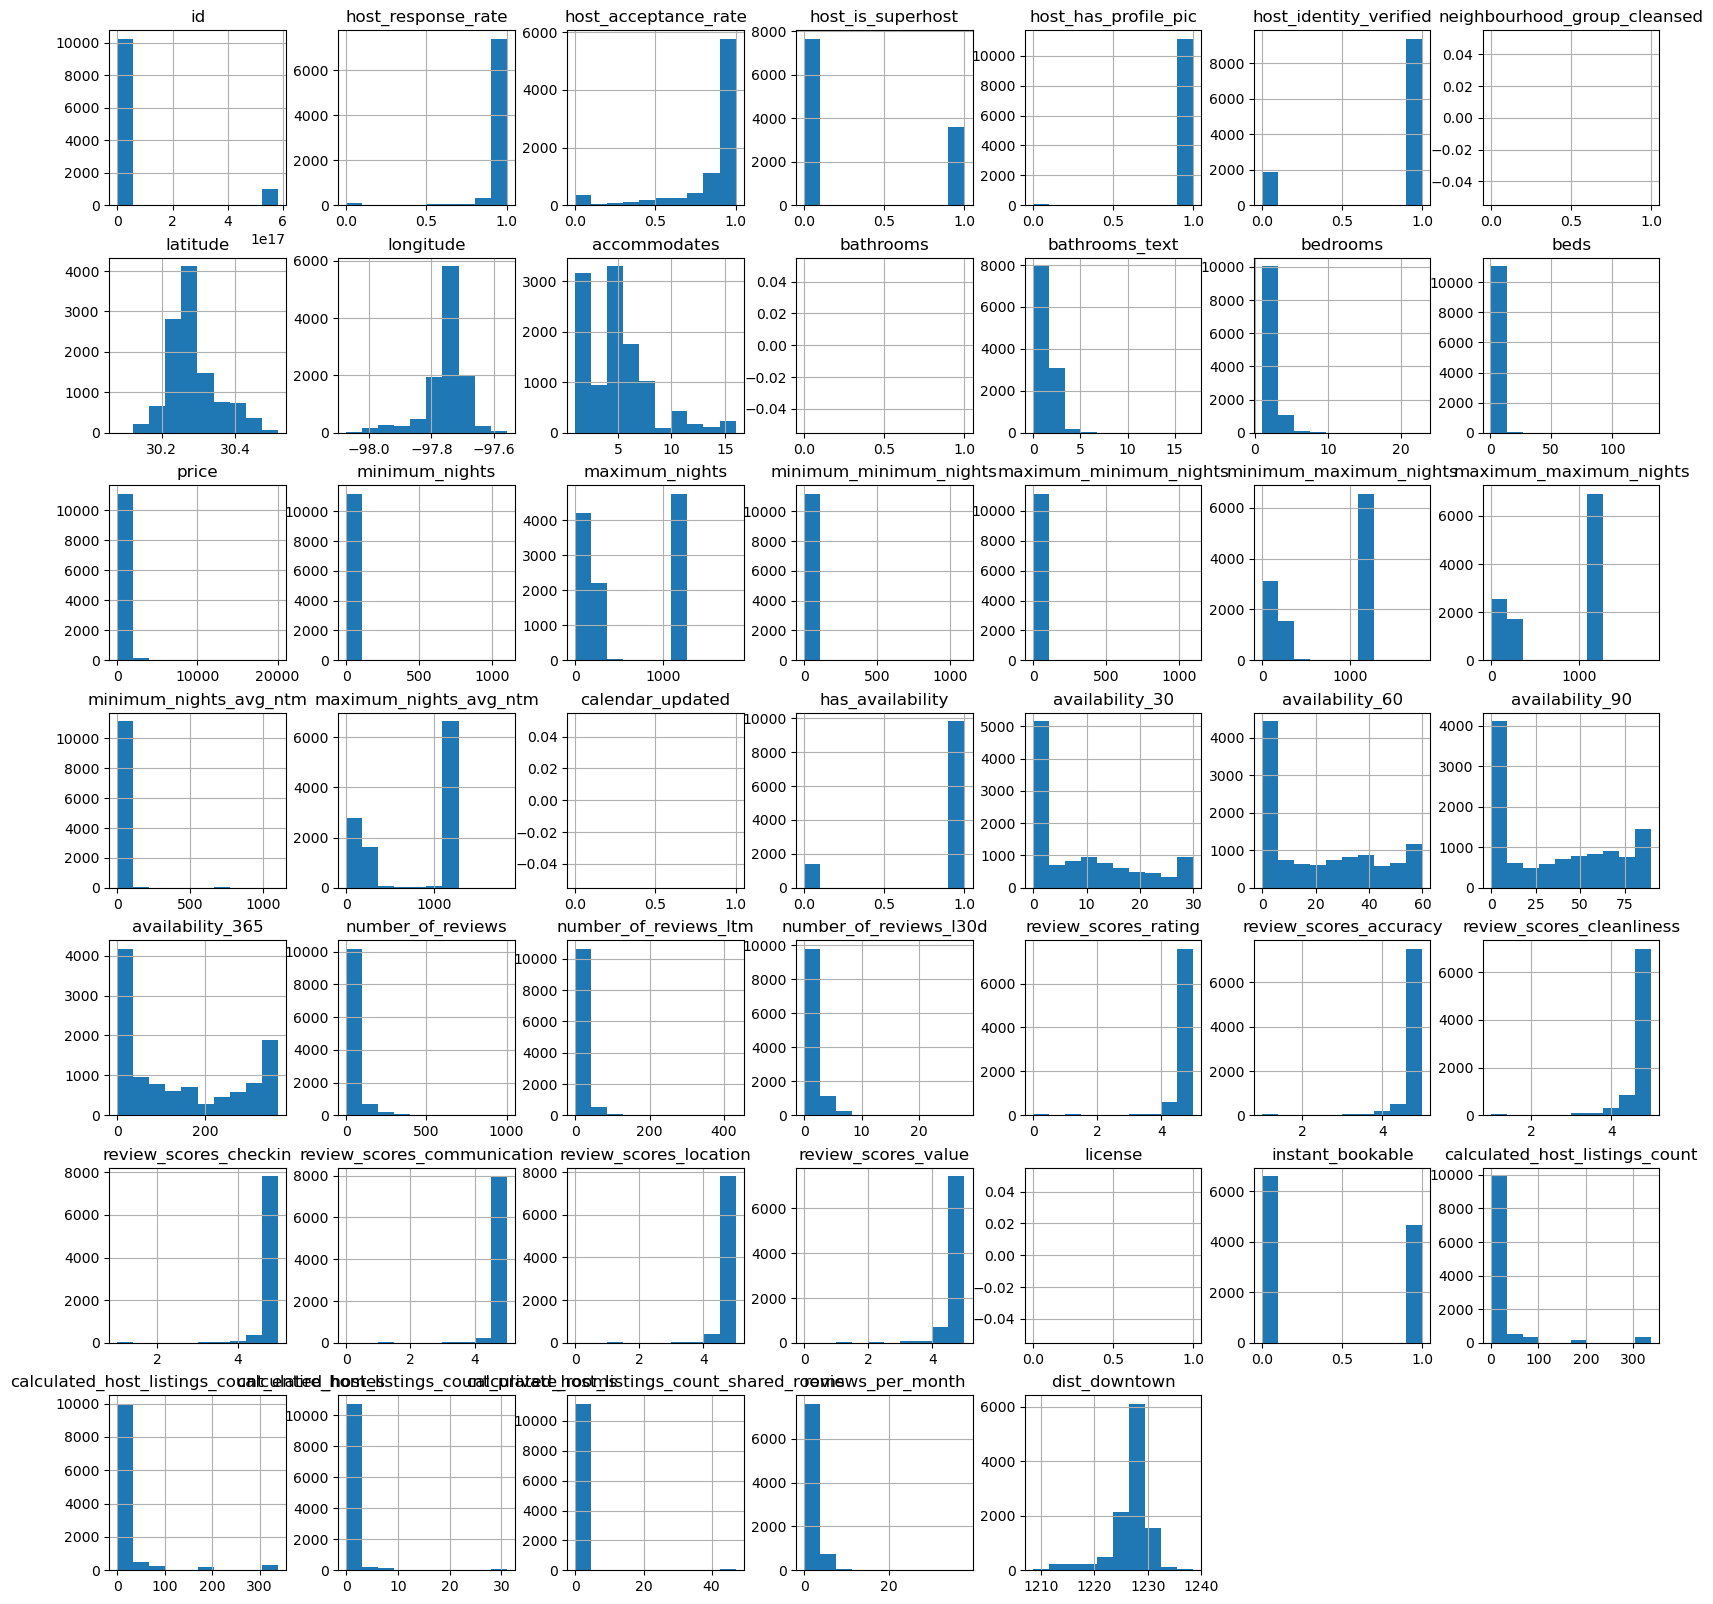

In [15]:
# Plot the numerical/boolean features
list_df.hist(figsize=(20,20))

### Initial Model/Test City

In [16]:
list_df_init = list_df.drop(['host_response_rate','host_acceptance_rate'], axis=1)
cols_to_keep = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
                'latitude','longitude','room_type','accommodates','bathrooms_text',
                'bedrooms','beds','price','minimum_nights','maximum_nights','has_availability',
                'availability_30','availability_60','availability_90','availability_365','number_of_reviews',
                'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating','instant_bookable',
                'calculated_host_listings_count','reviews_per_month', 'dist_downtown']

list_df_init = list_df_init[cols_to_keep]
list_df_init = list_df_init[cols_to_keep].dropna()

In [26]:
for col in cols_to_keep:
    print("- "+col)

- host_is_superhost
- host_has_profile_pic
- host_identity_verified
- latitude
- longitude
- room_type
- accommodates
- bathrooms_text
- bedrooms
- beds
- price
- minimum_nights
- maximum_nights
- has_availability
- availability_30
- availability_60
- availability_90
- availability_365
- number_of_reviews
- number_of_reviews_ltm
- number_of_reviews_l30d
- review_scores_rating
- instant_bookable
- calculated_host_listings_count
- reviews_per_month
- dist_downtown


In [17]:
# Prep data for modeling purposes
mod_df = pd.get_dummies(list_df_init, drop_first=True)
mod_df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month,dist_downtown,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,1.0,1.0,30.26057,-97.73441,3,1.0,1.0,2.0,240.0,2,90,1,7,18,44,305,585,42,5,4.83,0,1,3.69,1228.394068,0,0,0
1,1.0,1.0,1.0,30.45697,-97.78422,2,1.0,1.0,1.0,42.0,1,14,1,0,0,0,0,264,3,0,4.90,0,1,1.81,1221.522404,0,1,0
3,1.0,1.0,1.0,30.26034,-97.76487,3,1.0,1.0,2.0,325.0,3,365,1,9,19,39,107,268,30,3,4.97,1,1,2.09,1226.662969,0,0,0
4,0.0,1.0,0.0,30.23466,-97.73682,2,1.0,1.0,1.0,44.0,3,90,1,0,0,26,26,48,2,0,4.53,0,1,0.33,1228.798157,0,0,0
5,1.0,1.0,1.0,30.26098,-97.73072,3,2.0,2.0,2.0,250.0,30,180,1,0,4,4,207,14,2,0,5.00,0,2,0.10,1228.595817,0,0,0


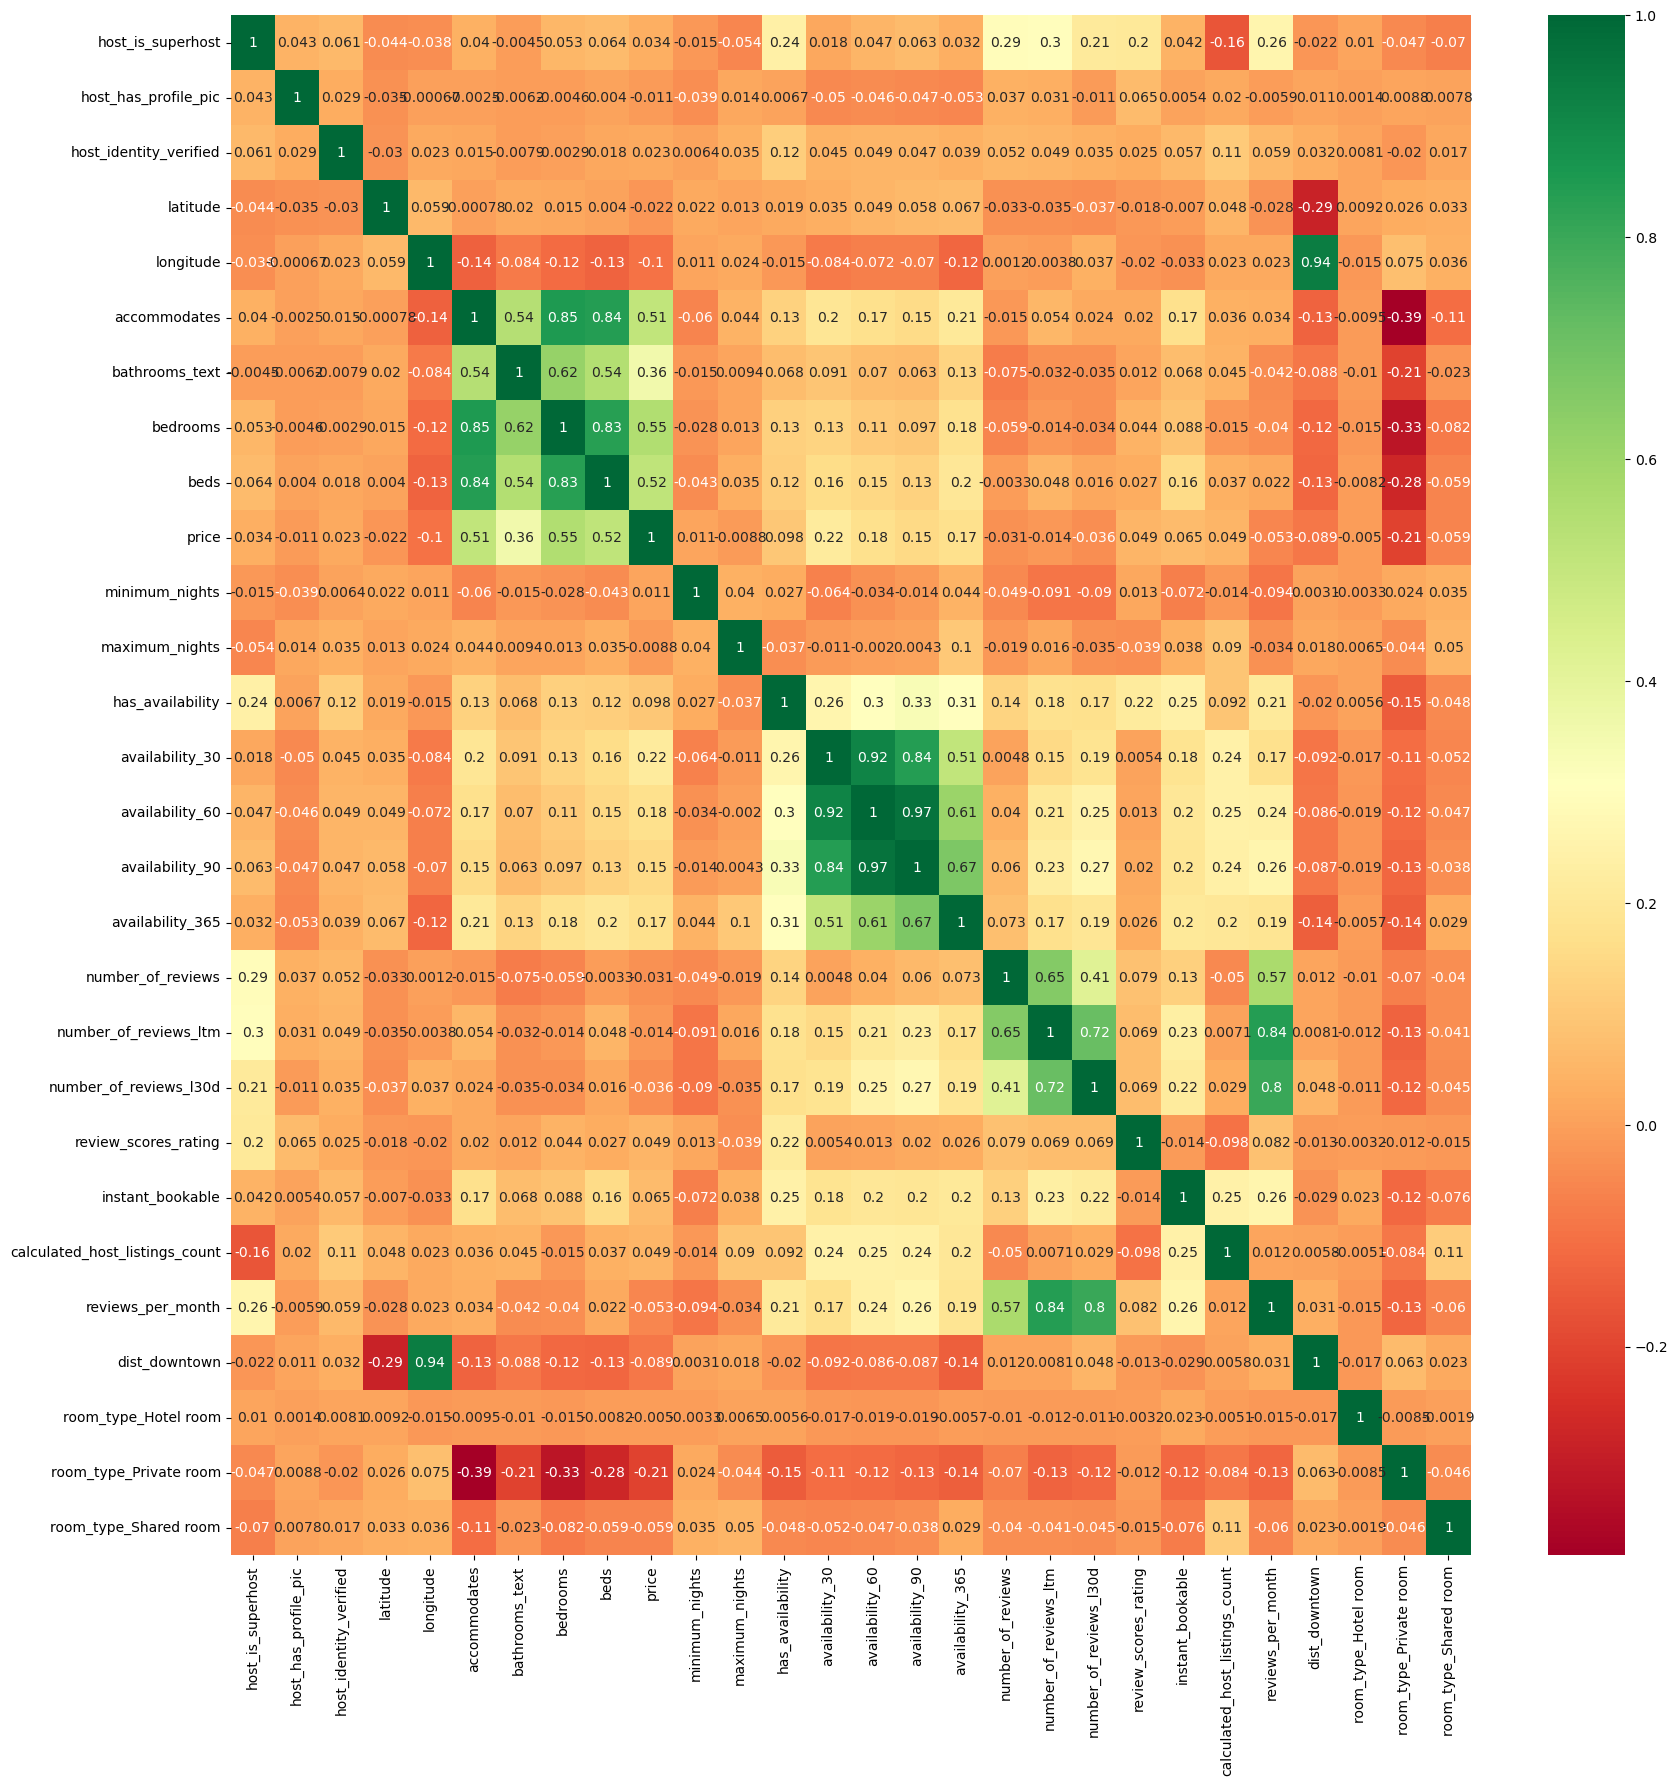

In [18]:
# Correlation heatmap
correlation = mod_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

In [19]:
model_meta_data = []

# Function to execute model and addd metadata
def execute_model(model, model_metadata, X_train, X_test, Y_train, Y_test, id, fit=True):
    if fit:
        model.fit(X_train,Y_train)

    Y_train_pred  = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Acquire train/test sensetivity scores
    mse_train = mean_squared_error(Y_train,Y_train_pred)
    mse_test = mean_squared_error(Y_test,Y_test_pred)

    # Precision score for train/test data
    rsq_train = r2_score(Y_train,Y_train_pred)
    rsq_test = r2_score(Y_test,Y_test_pred)

    # Apply 3-fold cross validation to understand model
    scores = cross_validate(model, X_train, Y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

    print(scores)

    # Store results in model metadata obj
    meta_data = {"model": model, 
                "id": id,
                "r2_train": rsq_train,
                "r2_test": rsq_test,
                "train_cross_val_r2": scores['train_r2'].mean(),
                "test_cross_val_r2": scores['test_r2'].mean(),
                "mse_train": mse_train,
                "mse_test": mse_test,
                "train_cross_val_mse": abs(scores['train_neg_mean_squared_error'].mean()),
                "test_cross_val_mse": abs(scores['test_neg_mean_squared_error'].mean()),
                }
    
    # print values
    for key, val in meta_data.items():
        print(key, val)
    

    model_metadata.append(meta_data)

    return Y_train_pred, Y_test_pred

def plot_pred_actual(actual, pred, model_name, lim=False):
    fig, ax = plt.subplots(figsize=(5, 4))


    ax.scatter(actual, pred, alpha=.7) #alpha helps to show overlapping data
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)

    ax.set_xlabel('Price')  
    ax.set_ylabel('Predicted Price')  
    ax.set_title(model_name) 
    if lim: 
        ax.set_xlim([0, 1000])

    plt.show()

def analyze_predictions(y, y_pred):
    y_inv = y
    y_pred_inv = y_pred
    mae_error = np.abs((y_inv - y_pred_inv))
    mse_error = (y_inv - y_pred_inv)**2

    
    res = pd.DataFrame({'price':y,'price_pred':y_pred, 'mse_error': mse_error,'mae_error':mae_error})
    print(res)
    res['bins'] = pd.cut(res['price'], bins=[0, 100, 200, 500, res['price'].max()], labels=['$0-$100', '$100-$200', '$200-$500', '$500-max'], include_lowest=True)

    print(res.groupby('bins')['mse_error'].median()**(1/2))
    # fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    # sns.violinplot(x='bins',y='mse_error',data=res, cut = 0,ax=ax) 
    fig1, ax1 = plt.subplots(1, 1, figsize=(8, 4))
    sns.violinplot(x='bins',y='mae_error',data=res, cut = 0, ax=ax1)

In [20]:
# Separating X and y
X = mod_df.drop('price', axis=1)
Y = mod_df['price']

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=55) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=57) 

{'fit_time': array([0.00806808, 0.00782895, 0.00712228, 0.00682497, 0.00740981]), 'score_time': array([0.00233102, 0.00429583, 0.00400281, 0.00213027, 0.00274301]), 'test_r2': array([0.5232731 , 0.24903574, 0.4070402 , 0.27793035, 0.36047217]), 'train_r2': array([0.33027533, 0.40624703, 0.36002474, 0.39011011, 0.36686007]), 'test_neg_mean_squared_error': array([-108251.79562322, -281131.78601289, -103365.5192186 ,
       -216373.8890849 , -140968.47022014]), 'train_neg_mean_squared_error': array([-179029.43201604, -136832.88564621, -179465.76238872,
       -151963.28650535, -170287.03425631])}
model LinearRegression()
id lin-reg
r2_train 0.3670512219151154
r2_test 0.39015567952750596
train_cross_val_r2 0.3707034565412175
test_cross_val_r2 0.36355031365231155
mse_train 164104.86230777283
mse_test 119262.38335747503
train_cross_val_mse 163515.68016252574
test_cross_val_mse 170018.29203195157


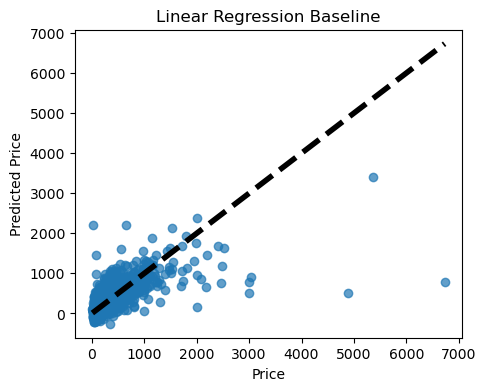

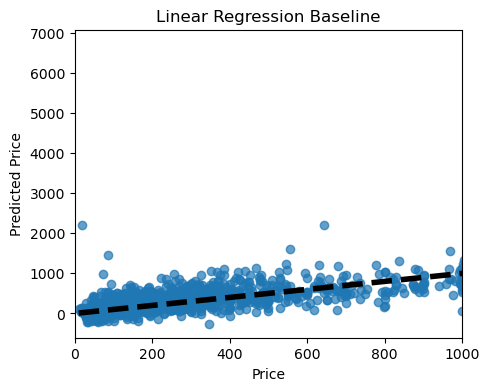

In [21]:
# Fit and analyze linear regression model
lin_reg = LinearRegression()  

# Run model with helper function
y_train_pred, y_val_pred = execute_model(lin_reg, model_meta_data, X_train, X_val, y_train, y_val, 'lin-reg')

plot_pred_actual(y_val, y_val_pred,'Linear Regression Baseline')
plot_pred_actual(y_val, y_val_pred,'Linear Regression Baseline', lim=True)

{'fit_time': array([0.00426602, 0.00515795, 0.0084312 , 0.00294399, 0.00461078]), 'score_time': array([0.00398493, 0.00320911, 0.00370622, 0.00198007, 0.00222516]), 'test_r2': array([0.510466  , 0.23960916, 0.39882543, 0.27181971, 0.34322956]), 'train_r2': array([0.32043602, 0.39543079, 0.34945692, 0.37871471, 0.35802121]), 'test_neg_mean_squared_error': array([-111159.94219195, -284660.73061866, -104797.52817715,
       -218204.99183392, -144769.18711066]), 'train_neg_mean_squared_error': array([-181659.65753413, -139325.5329135 , -182429.25459173,
       -154802.62147288, -172664.3021589 ])}
model Ridge()
id ridge
r2_train 0.35684283636909786
r2_test 0.37440714889322046
train_cross_val_r2 0.3604119317168875
test_cross_val_r2 0.3527899733309969
mse_train 166751.5941799516
mse_test 122342.19772119317
train_cross_val_mse 166176.27373422595
test_cross_val_mse 172718.47598646744


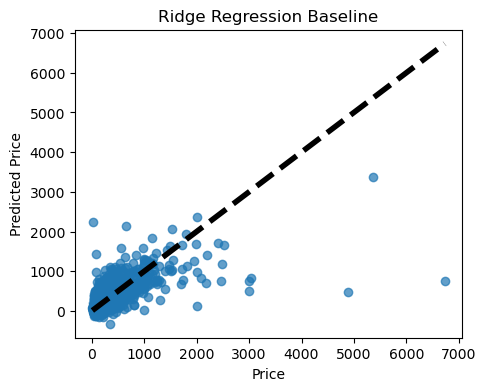

In [22]:
# Fit and analyze linear regression model
lin_reg = linear_model.Ridge()  

# Run model with helper function
y_train_pred, y_val_pred = execute_model(lin_reg, model_meta_data, X_train, X_val, y_train, y_val, 'ridge')

plot_pred_actual(y_val, y_val_pred, 'Ridge Regression Baseline')

/Users/rajivswamy/opt/anaconda3/envs/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.695e+08, tolerance: 1.385e+05
  model = cd_fast.enet_coordinate_descent(
/Users/rajivswamy/opt/anaconda3/envs/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.208e+08, tolerance: 1.142e+05
  model = cd_fast.enet_coordinate_descent(
/Users/rajivswamy/opt/anaconda3/envs/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'fit_time': array([0.38074207, 0.29058528, 0.27908587, 0.30852199, 0.14877105]), 'score_time': array([0.00539494, 0.00745702, 0.00454903, 0.00374699, 0.00308919]), 'test_r2': array([0.51023557, 0.23945047, 0.39857633, 0.27165757, 0.34291532]), 'train_r2': array([0.32025216, 0.39520564, 0.34925196, 0.37849229, 0.35785277]), 'test_neg_mean_squared_error': array([-111212.2674484 , -284720.14115102, -104840.95177375,
       -218253.57966447, -144838.45334971]), 'train_neg_mean_squared_error': array([-181708.80484137, -139377.41975796, -182486.73056199,
       -154858.04304843, -172709.604131  ])}
model Lasso(alpha=0.01)
id lasso
r2_train 0.3565729363049015
r2_test 0.2923715573478748
train_cross_val_r2 0.3602109660486583
test_cross_val_r2 0.3525670502001029
mse_train 166821.57126878624
mse_test 183603.5061264524
train_cross_val_mse 166228.1204681496
test_cross_val_mse 172773.07867747077


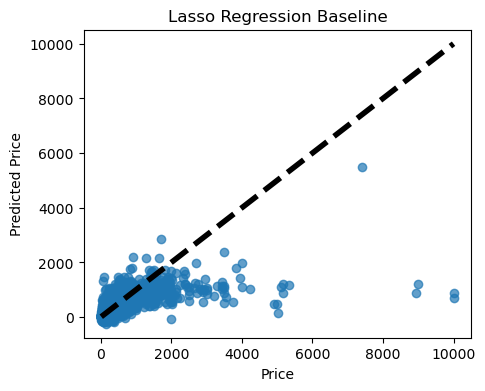

In [23]:
# Fit and analyze linear regression model
lin_reg = linear_model.Lasso(alpha=0.01)  

# Run model with helper function
y_train_pred, y_test_pred = execute_model(lin_reg, model_meta_data, X_train, X_test, y_train, y_test, 'lasso')

plot_pred_actual(y_train, y_train_pred, 'Lasso Regression Baseline')

{'fit_time': array([ 9.26357007, 14.6083529 , 10.34450507,  9.82148099,  6.65106201]), 'score_time': array([0.27179503, 0.36425114, 0.08846188, 0.06509495, 0.05925465]), 'test_r2': array([0.54039211, 0.3148735 , 0.49991402, 0.27643864, 0.42122665]), 'train_r2': array([0.9159175 , 0.92199154, 0.91658513, 0.92709407, 0.90966714]), 'test_neg_mean_squared_error': array([-104364.53174145, -256484.69394213,  -87175.63510245,
       -216820.8942783 , -127576.61147547]), 'train_neg_mean_squared_error': array([-22476.7629332 , -17977.38040036, -23391.70506088, -18165.61359417,
       -24295.6004249 ])}
model RandomForestRegressor(n_estimators=180)
id random-forest
r2_train 0.9142404554478302
r2_test 0.569157087904856
train_cross_val_r2 0.9182510768666615
test_cross_val_r2 0.4105689821447422
mse_train 22234.90863335506
mse_test 84256.50747936998
train_cross_val_mse 21261.412482701904
test_cross_val_mse 158484.4733079591


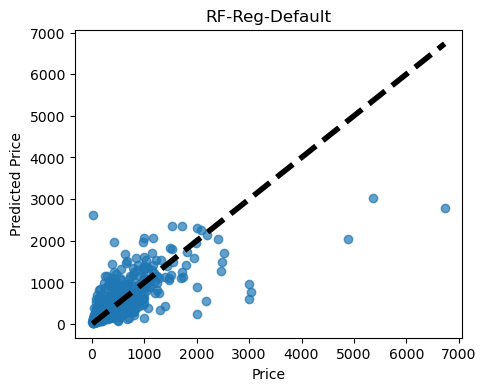

In [25]:
rf_reg  = RandomForestRegressor(n_estimators=180)

y_train_pred, y_val_pred = execute_model(rf_reg, model_meta_data, X_train, X_val, y_train, y_val, 'random-forest')

plot_pred_actual(y_val, y_val_pred, 'RF-Reg-Default')

{'fit_time': array([3.05922723, 2.51409292, 2.541435  , 2.58917308, 2.68202281]), 'score_time': array([0.03660798, 0.02354789, 0.02258897, 0.02220798, 0.02452922]), 'test_r2': array([0.51398917, 0.29576045, 0.49279601, 0.24870804, 0.37164117]), 'train_r2': array([0.76132727, 0.76034069, 0.7644925 , 0.76016502, 0.77910703]), 'test_neg_mean_squared_error': array([-110359.92592101, -263639.8756451 ,  -88416.45470569,
       -225130.5881098 , -138506.53372198]), 'train_neg_mean_squared_error': array([-63801.50768799, -55230.50322098, -66042.4475406 , -59758.51209941,
       -59410.57691334])}
model RandomForestRegressor(max_depth=7, n_estimators=180)
id random-forest
r2_train 0.7439331706629548
r2_test 0.505402922149149
train_cross_val_r2 0.765086501291233
test_cross_val_r2 0.38457896734487396
mse_train 66390.54094880995
mse_test 96724.40051656695
train_cross_val_mse 60848.70949246486
test_cross_val_mse 165210.67562071478


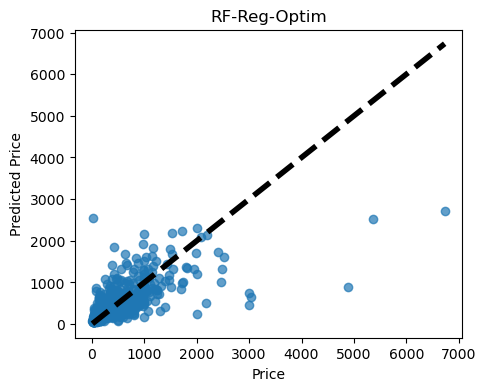

In [27]:
rf_reg  = RandomForestRegressor(max_depth = 7, n_estimators=180)

y_train_pred, y_val_pred = execute_model(rf_reg, model_meta_data, X_train, X_val, y_train, y_val, 'random-forest')

plot_pred_actual(y_val, y_val_pred, 'RF-Reg-Optim')

{'fit_time': array([0.69997001, 0.53666091, 0.35091209, 0.40136814, 0.44473386]), 'score_time': array([0.00560999, 0.00550604, 0.00487399, 0.00581598, 0.00425434]), 'test_r2': array([0.56806918, 0.32903726, 0.40331687, 0.20828666, 0.44511634]), 'train_r2': array([0.98629921, 0.98652765, 0.98736106, 0.98783086, 0.98761091]), 'test_neg_mean_squared_error': array([ -98079.81599017, -251182.33208923, -104014.57488605,
       -237243.17257041, -122310.70639556]), 'train_neg_mean_squared_error': array([-3662.46637916, -3104.75967337, -3544.28848669, -3032.12399774,
       -3332.12411099])}
model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, 

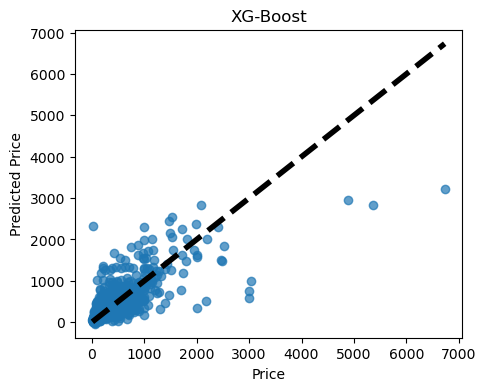

In [28]:
# xgboost regressor with default parameters only
xgb_reg = xgb.XGBRegressor()

y_train_pred, y_val_pred = execute_model(xgb_reg, model_meta_data, X_train, X_val, y_train, y_val, 'xg-boost')

plot_pred_actual(y_val, y_val_pred, 'XG-Boost')

{'fit_time': array([0.59683776, 0.25239897, 0.40314174, 0.22185898, 0.2217381 ]), 'score_time': array([0.00443125, 0.00468898, 0.00468898, 0.00425005, 0.004143  ]), 'test_r2': array([0.59187655, 0.33153301, 0.52006496, 0.23704408, 0.37262404]), 'train_r2': array([0.74340219, 0.76440267, 0.76451589, 0.79354203, 0.77377209]), 'test_neg_mean_squared_error': array([ -92673.80552641, -250248.01964518,  -83662.89648   ,
       -228625.78536058, -138289.88371746]), 'train_neg_mean_squared_error': array([-68593.20449107, -54294.4012634 , -66035.88805046, -51442.12483963,
       -60845.44227931])}
model XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_ra

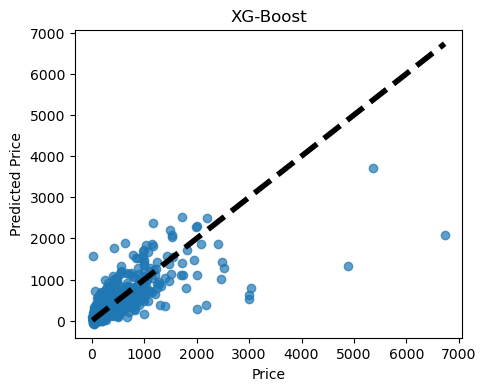

In [33]:
# xgboost regressor with modified parameters
xgb_reg = xgb.XGBRegressor(n_estimators=180, max_depth=2, alpha=100)

y_train_pred, y_val_pred = execute_model(xgb_reg, model_meta_data, X_train, X_val, y_train, y_val, 'xg-boost')

plot_pred_actual(y_val, y_val_pred, 'XG-Boost')